## Graph matching results with precision matrices
### alpha = 0.00
### beta = 0.0002

In [31]:
import numpy as np
import os
from PIL import Image
import scipy.io as sio
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import dataframe_image as dfi
from IPython.display import display 
import pandas as pd

cwd = os.getcwd()

In [32]:
import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = spio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], spio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, spio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

In [33]:
# alphas 0, 1, 2, 3 correspond to: alpha paramter = 0, 0.0025, 0.0075, 0.0125 respectively
alpha = 0
beta = 2

results_dir = str(cwd) + '/results/jupyter/precision/stroke/alpha' + str(alpha) + '_beta' + str(beta) +'/'
figures_dir = results_dir + 'figures/'

# make results table.
results_dir = str(cwd) + '/results/jupyter/precision/stroke/alpha'+ str(alpha) + '_beta' + str(beta) +'/'
results=loadmat(results_dir  + 'results.mat')
results=results['results']

In [34]:
def color_negative_red(val): 
    """ 
    Takes a scalar and returns a string with 
    the css property `'color: red'` for negative 
    strings, black otherwise. 
    """
    color = 'red' if (val < 0.05 and val > 0) else 'black'
    return 'color: % s' % color 

### Analysis 0
Remapping patterns across all subjects and time points:
   - Subjects listed vertically, brain regions listed horizontally (left - right)
   - Purple ticks indicate the node was mapped to itself
   - Yellow ticks indicate that the node was mapped to a different node (i.e. remapped)
   - Turquoise blocks indicate no data for that subject 

(-0.5, 2916.5, 1457.5, -0.5)

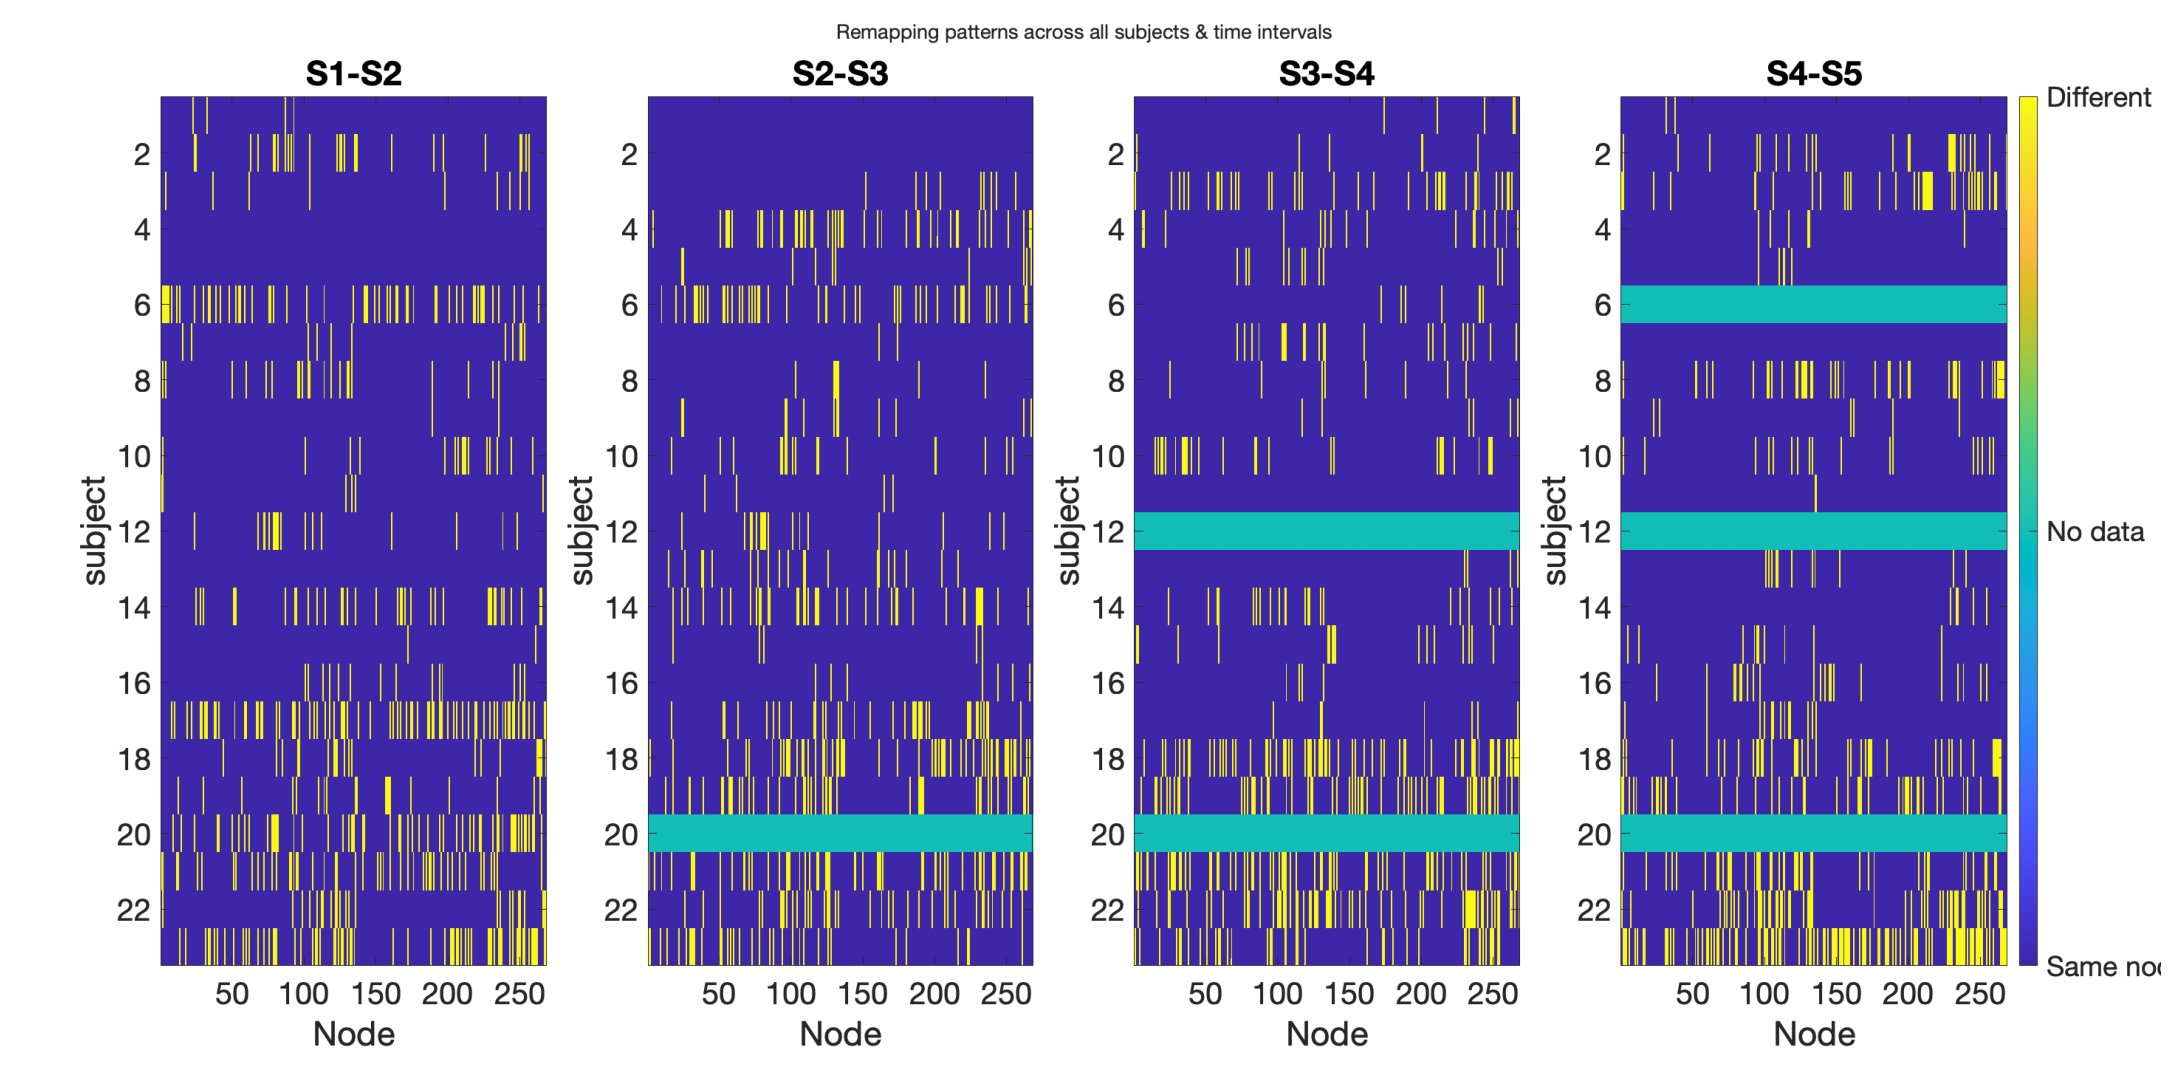

In [35]:
img1 = mpimg.imread(str(figures_dir+'remapping_raster_allsubjects_overtime.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)

ax1.imshow(img1)
ax1.axis('off')

### Analysis 1

Correlation between each brain region's remap frequency and mean ChaCo scores across subjects

,S1-S2,S2-S3,S3-S4,S4-S5
Stat,,,,
Pearson p,0.000179,0.060292,0.000000,0.000361
Pearson rho,0.226965,0.114914,0.303800,0.216311


(-0.5, 2916.5, 1457.5, -0.5)

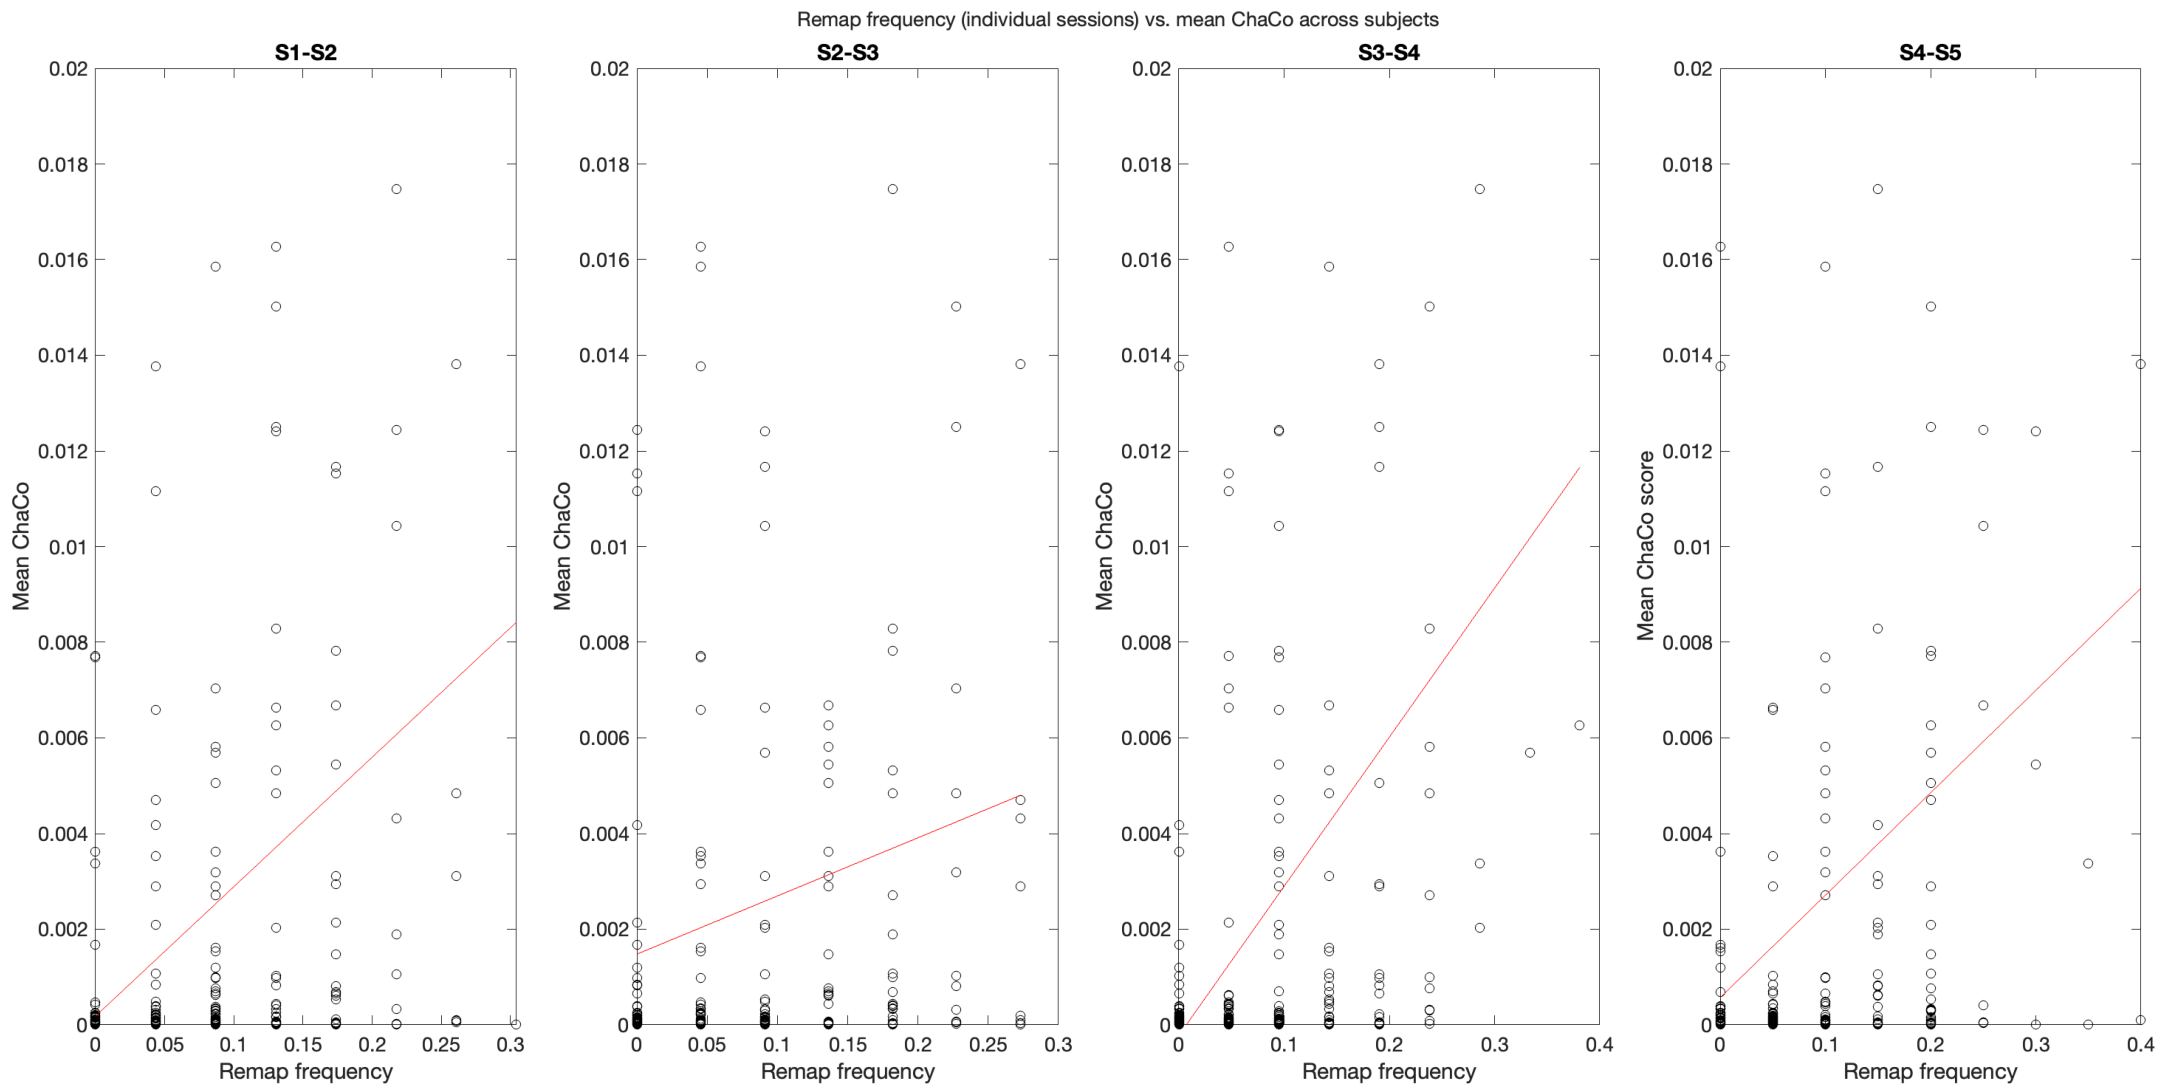

In [36]:
# Analysis 1 
a1=results['corr_w_chaco']
a1s1=a1['s1s2']
a1s2=a1['s2s3']
a1s3=a1['s3s4']
a1s4=a1['s4s5']


dict = {'Stat' : ['Pearson p', 'Pearson rho'],
        'S1-S2' : [a1s1['p'], a1s1['rho']] ,
        'S2-S3' : [a1s2['p'], a1s2['rho']] ,
        'S3-S4' : [a1s3['p'], a1s3['rho']] , 
        'S4-S5' : [a1s4['p'], a1s4['rho']]}

df = pd.DataFrame(dict) 
df=df.set_index('Stat')
df=df.style.applymap(color_negative_red).set_caption("Analysis 1")
display(df)

img2 = mpimg.imread(str(figures_dir+'corr_remapping_chaco.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img2)
ax1.axis('off')

### Analysis 2

Top figure: remap frequency of each gray matter region, averaged across all pairs of sessions, versus the mean ChaCo score of that region across subjects.
Bottom figure: remap frequency of each gray matter region, averaged across all pairs of sessions, versus the **log-transformed** mean ChaCo score of that region across subjects.

,Value
Stat,
Spearman p,0.000109
Spearman rho,0.234164
Pearson p,0.000003
Pearson rho,0.281200


,Value
Stat,
Pearson p,0.000109
Pearson rho,0.234164


(-0.5, 1457.5, 1457.5, -0.5)

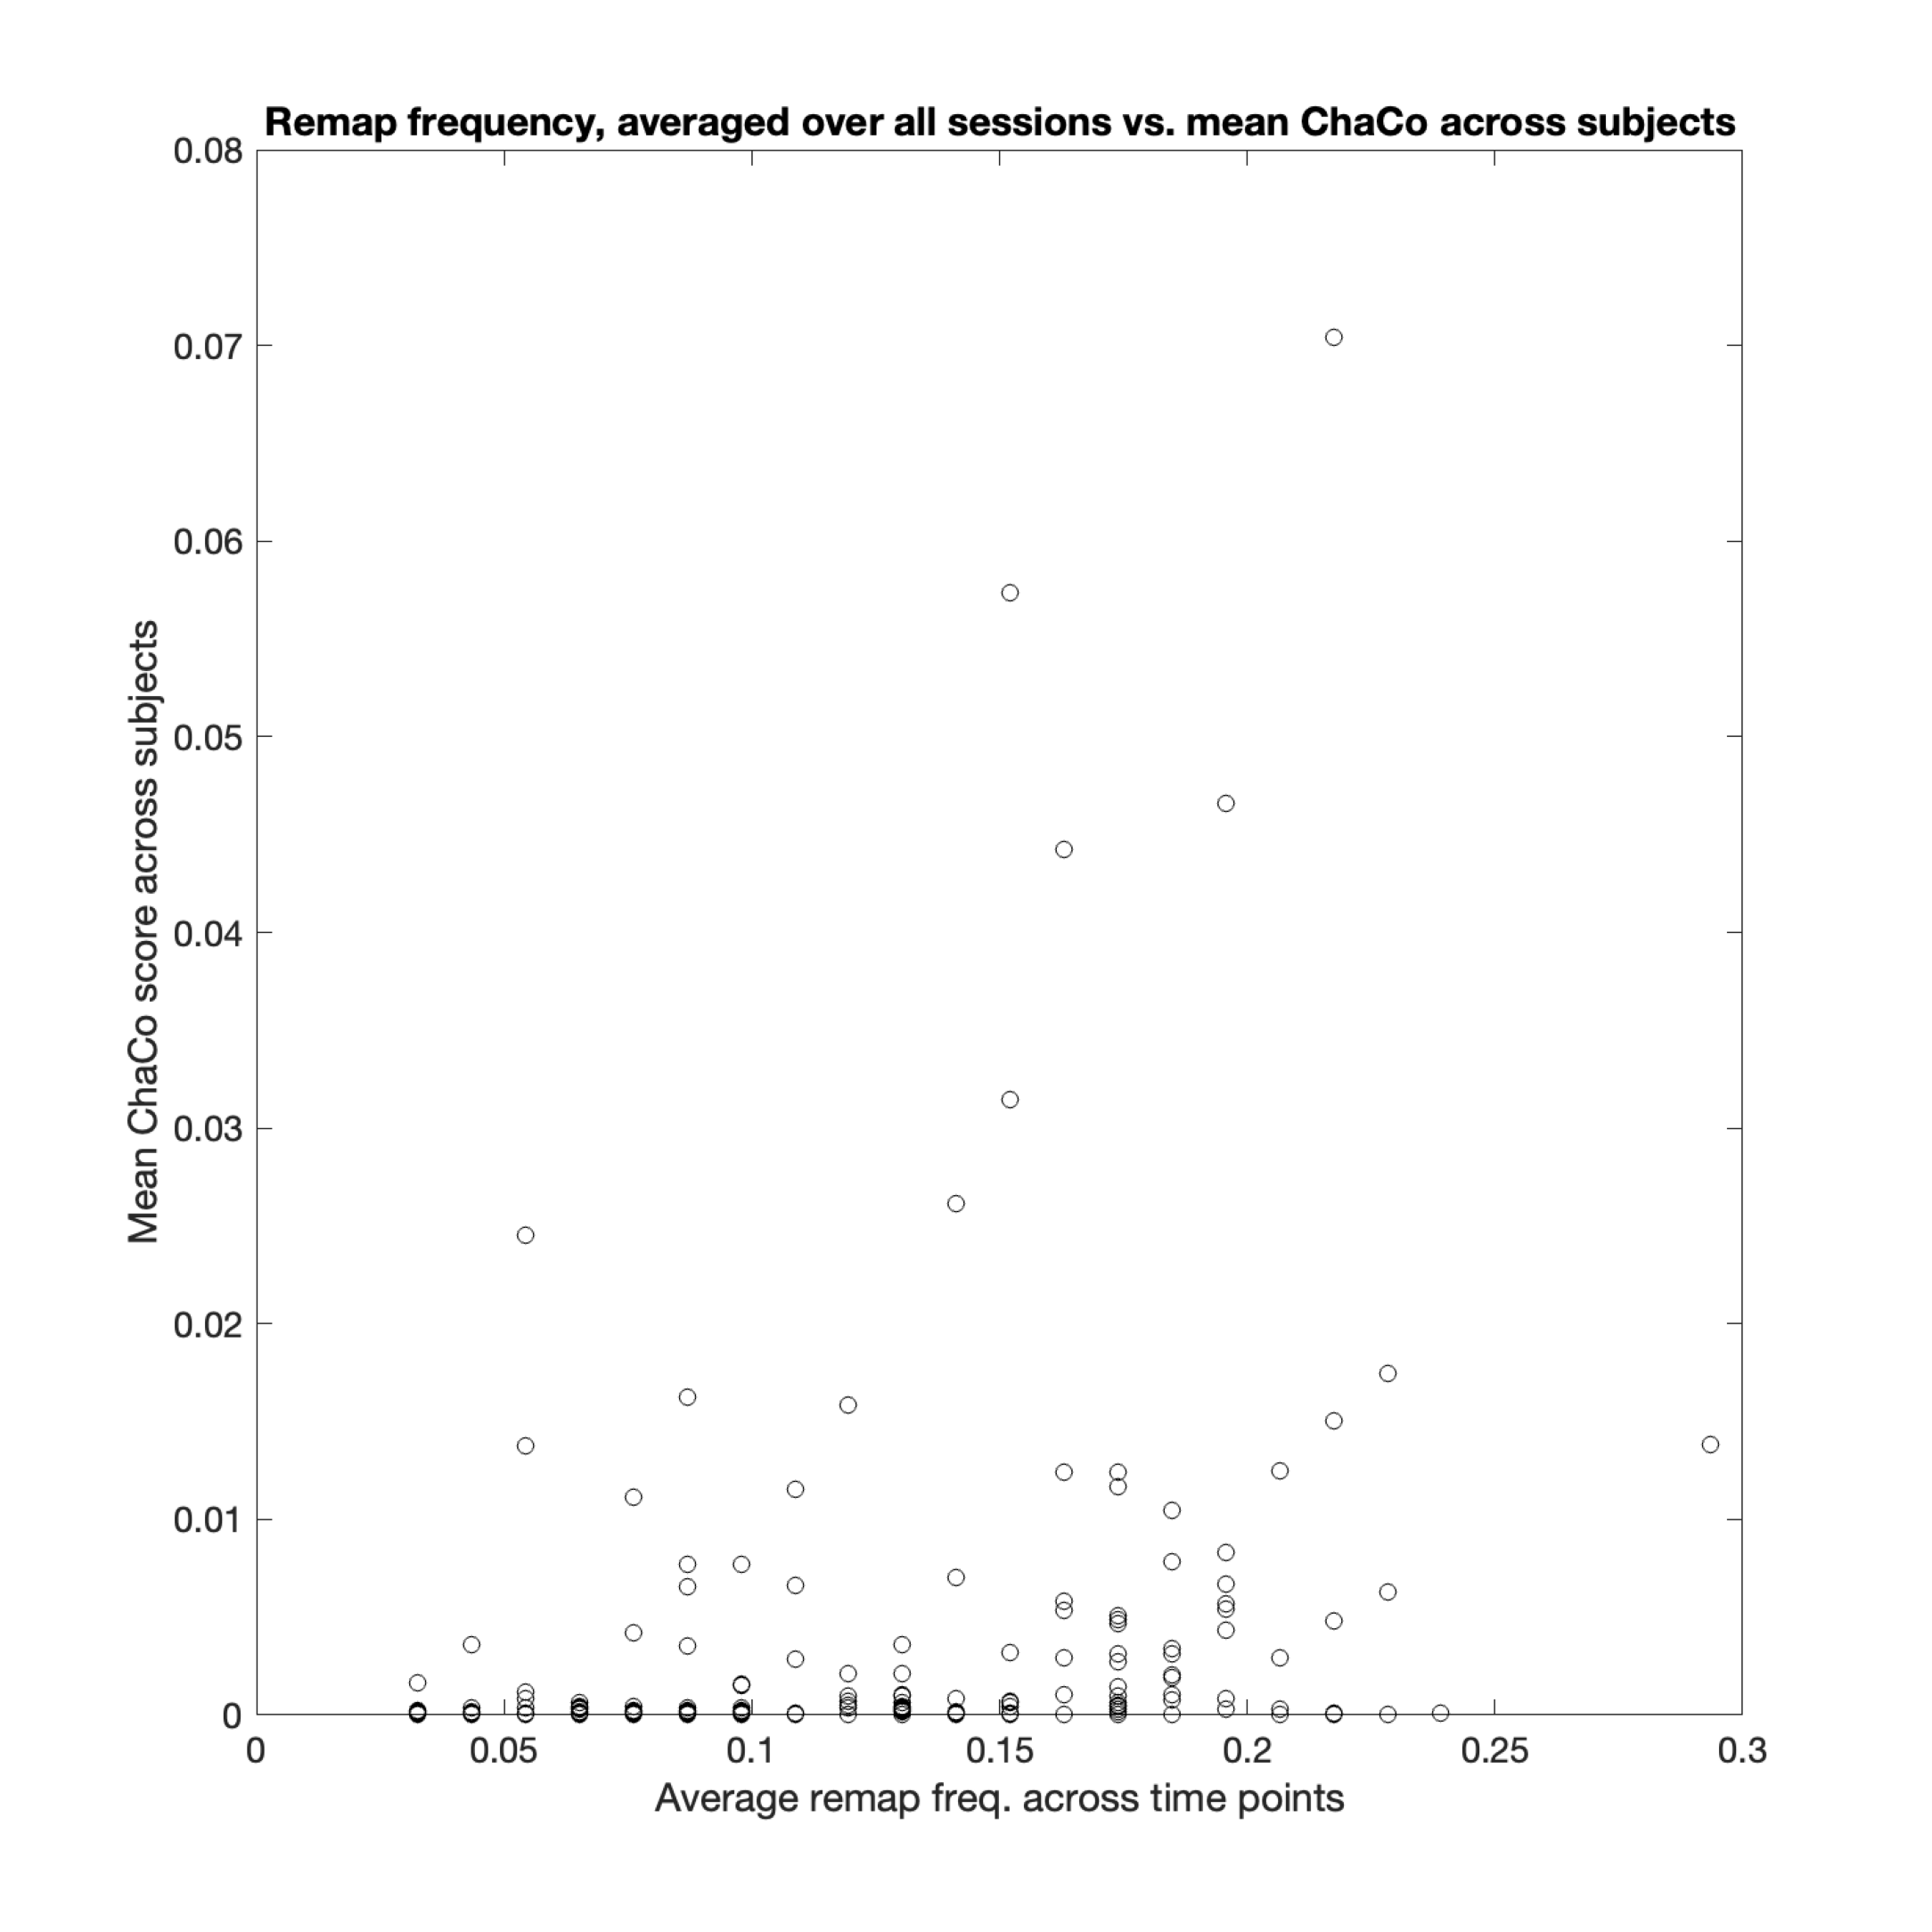

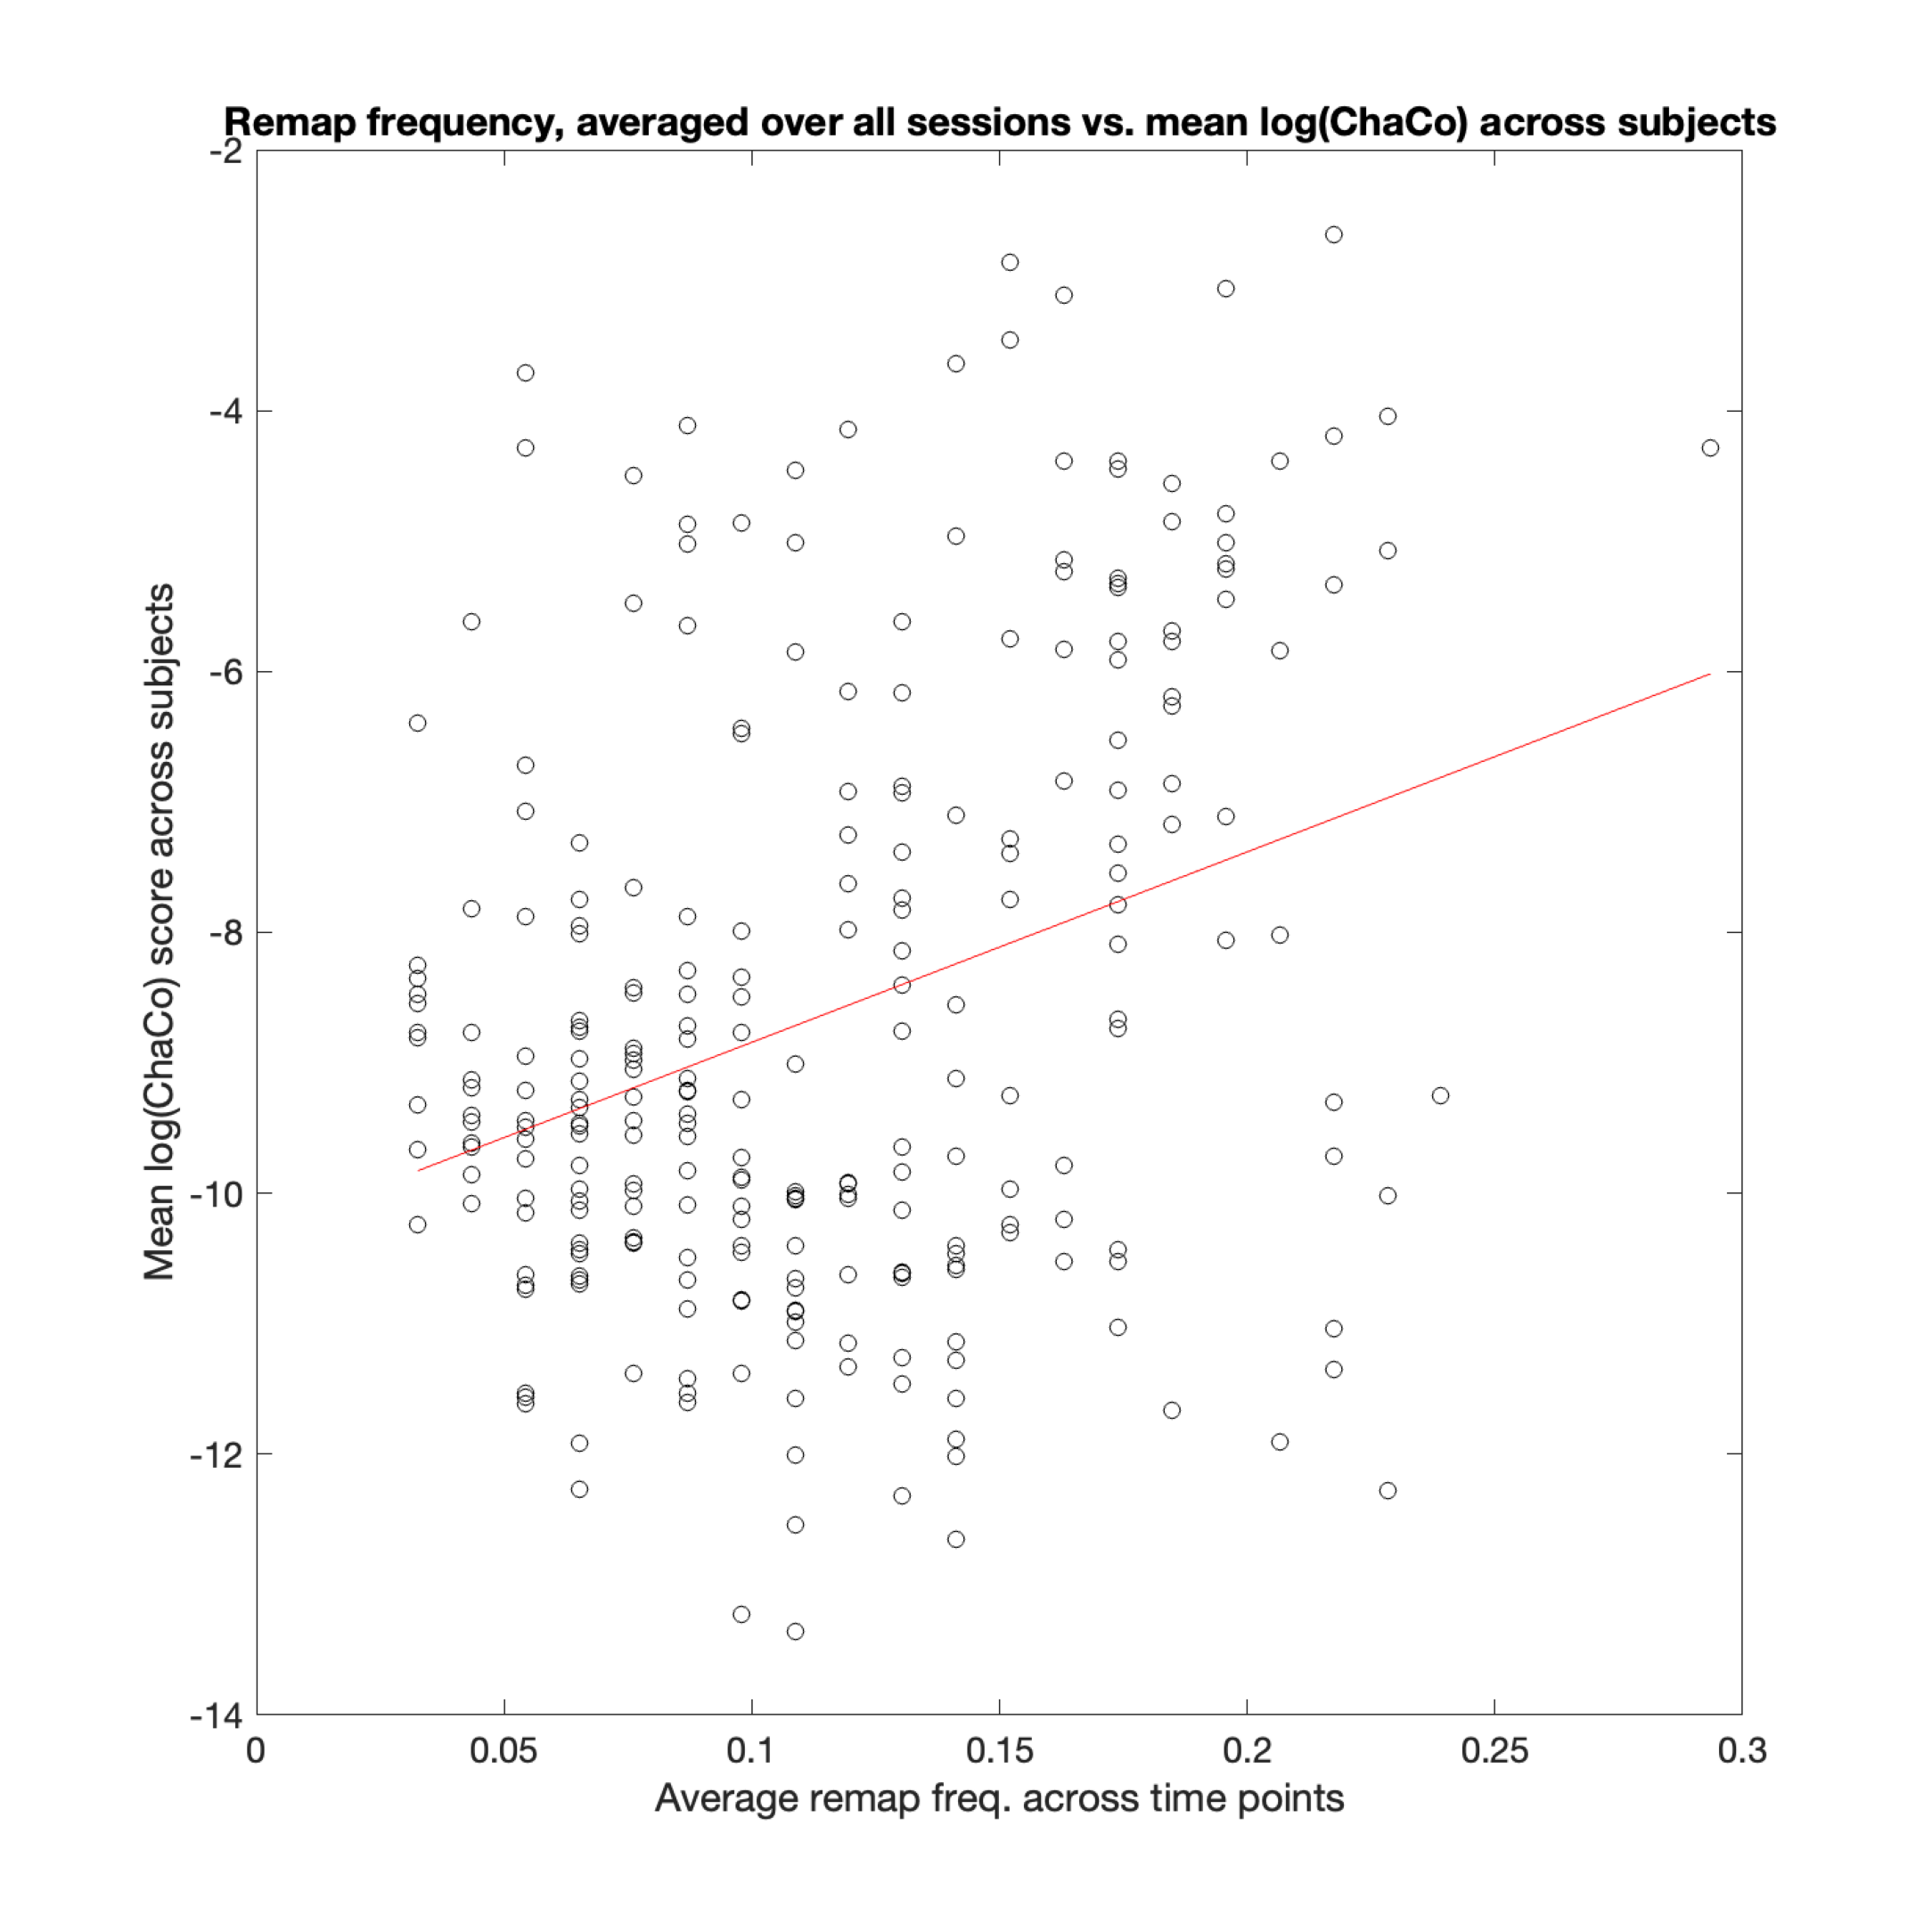

In [37]:
# Analysis 2 - Correlation between remap frequency and ChaCo scores - all sessions combined
a2=results['corr_w_chaco_allsessions']

dict = {'Stat' : ['Spearman p', 'Spearman rho', 'Pearson p', 'Pearson rho'],
        'Value' : [a2['pearson_p'], a2['pearson_rho'],a2['spearman_p'],a2['spearman_rho']]}


df2 = pd.DataFrame(dict) 
df2=df2.set_index('Stat')
df2=df2.style.applymap(color_negative_red).set_caption("Analysis 2a")
display(df2)
img1 = mpimg.imread(str(figures_dir+'corr_remapping_chaco_allsessions.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)

ax1.imshow(img1)
ax1.axis('off')
a2b=results['corr_w_chaco_allsessions_log']

dict = {'Stat' : ['Pearson p', 'Pearson rho'],
        'Value' : [a2b['pearson_p'], a2b['pearson_rho']]}
df2b = pd.DataFrame(dict) 
df2b=df2b.set_index('Stat')
df2b=df2b.style.applymap(color_negative_red).set_caption("Analysis 2b - log transformed data")
display(df2b)


img2 = mpimg.imread(str(figures_dir+'corr_remapping_chaco_allsessions_log.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)

ax1.imshow(img2)
ax1.axis('off')

### Analysis 3
Correlation between the number of swaps between 7 days and 14 days post-stroke and baseline impairment (day 7 Fugl-Meyer score)

,Value
Stat,
Pearson p,0.007753
Pearson rho,-0.563933


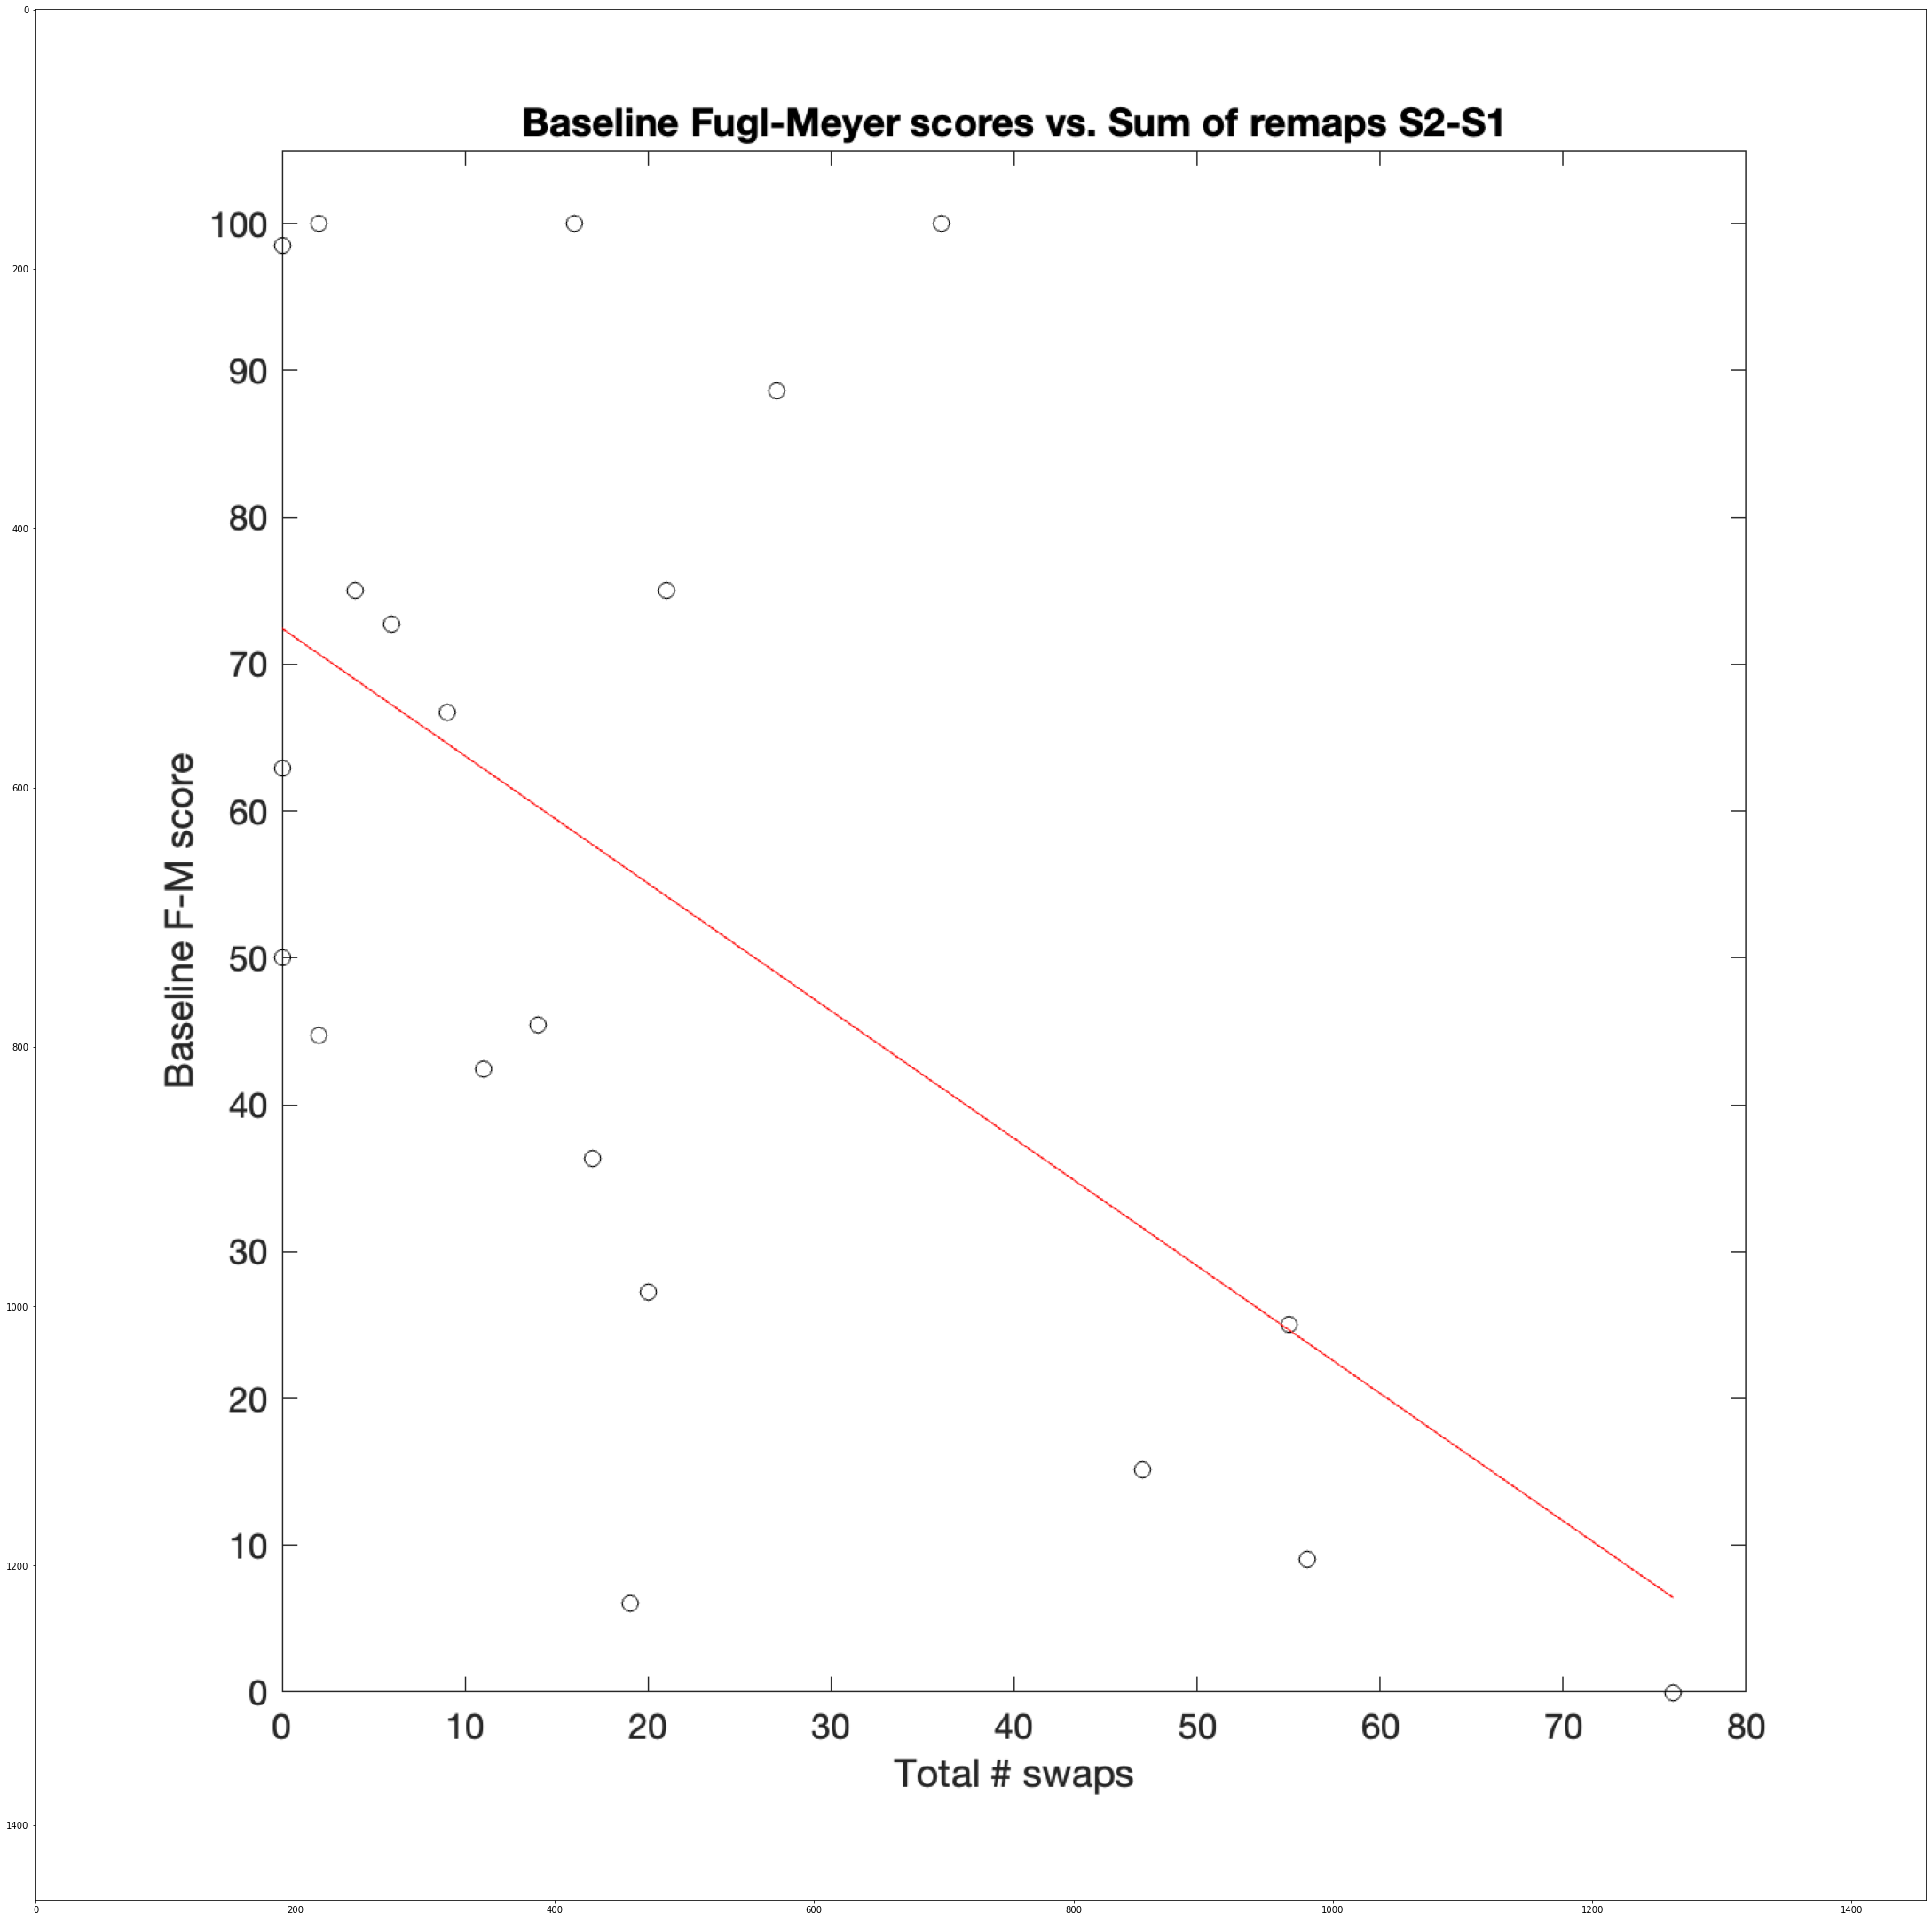

In [38]:
# Analysis 3 - Baseline FM vs. number of swaps S1-S2
a3=results['baselineFM_remaps_s1s2']

dict = {'Stat' : ['Pearson p', 'Pearson rho'],
        'Value' : [a3['p'], a3['rho']]}

df3 = pd.DataFrame(dict) 
df3=df3.set_index('Stat')
df3=df3.style.applymap(color_negative_red).set_caption("Analysis 3")

display(df3)
img1 = mpimg.imread(str(figures_dir+'baselineFM_remaps_s1s2.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img1)


### Analysis 4
Correlation between the number of swaps between day 7 and day 14 post-stroke and the degree of motor recovery at 6 months (6 month (S5) FM score - 1 week (S1) FM score)

,Value
Stat,
Pearson p,0.014122
Pearson rho,0.567068


(-0.5, 1457.5, 1457.5, -0.5)

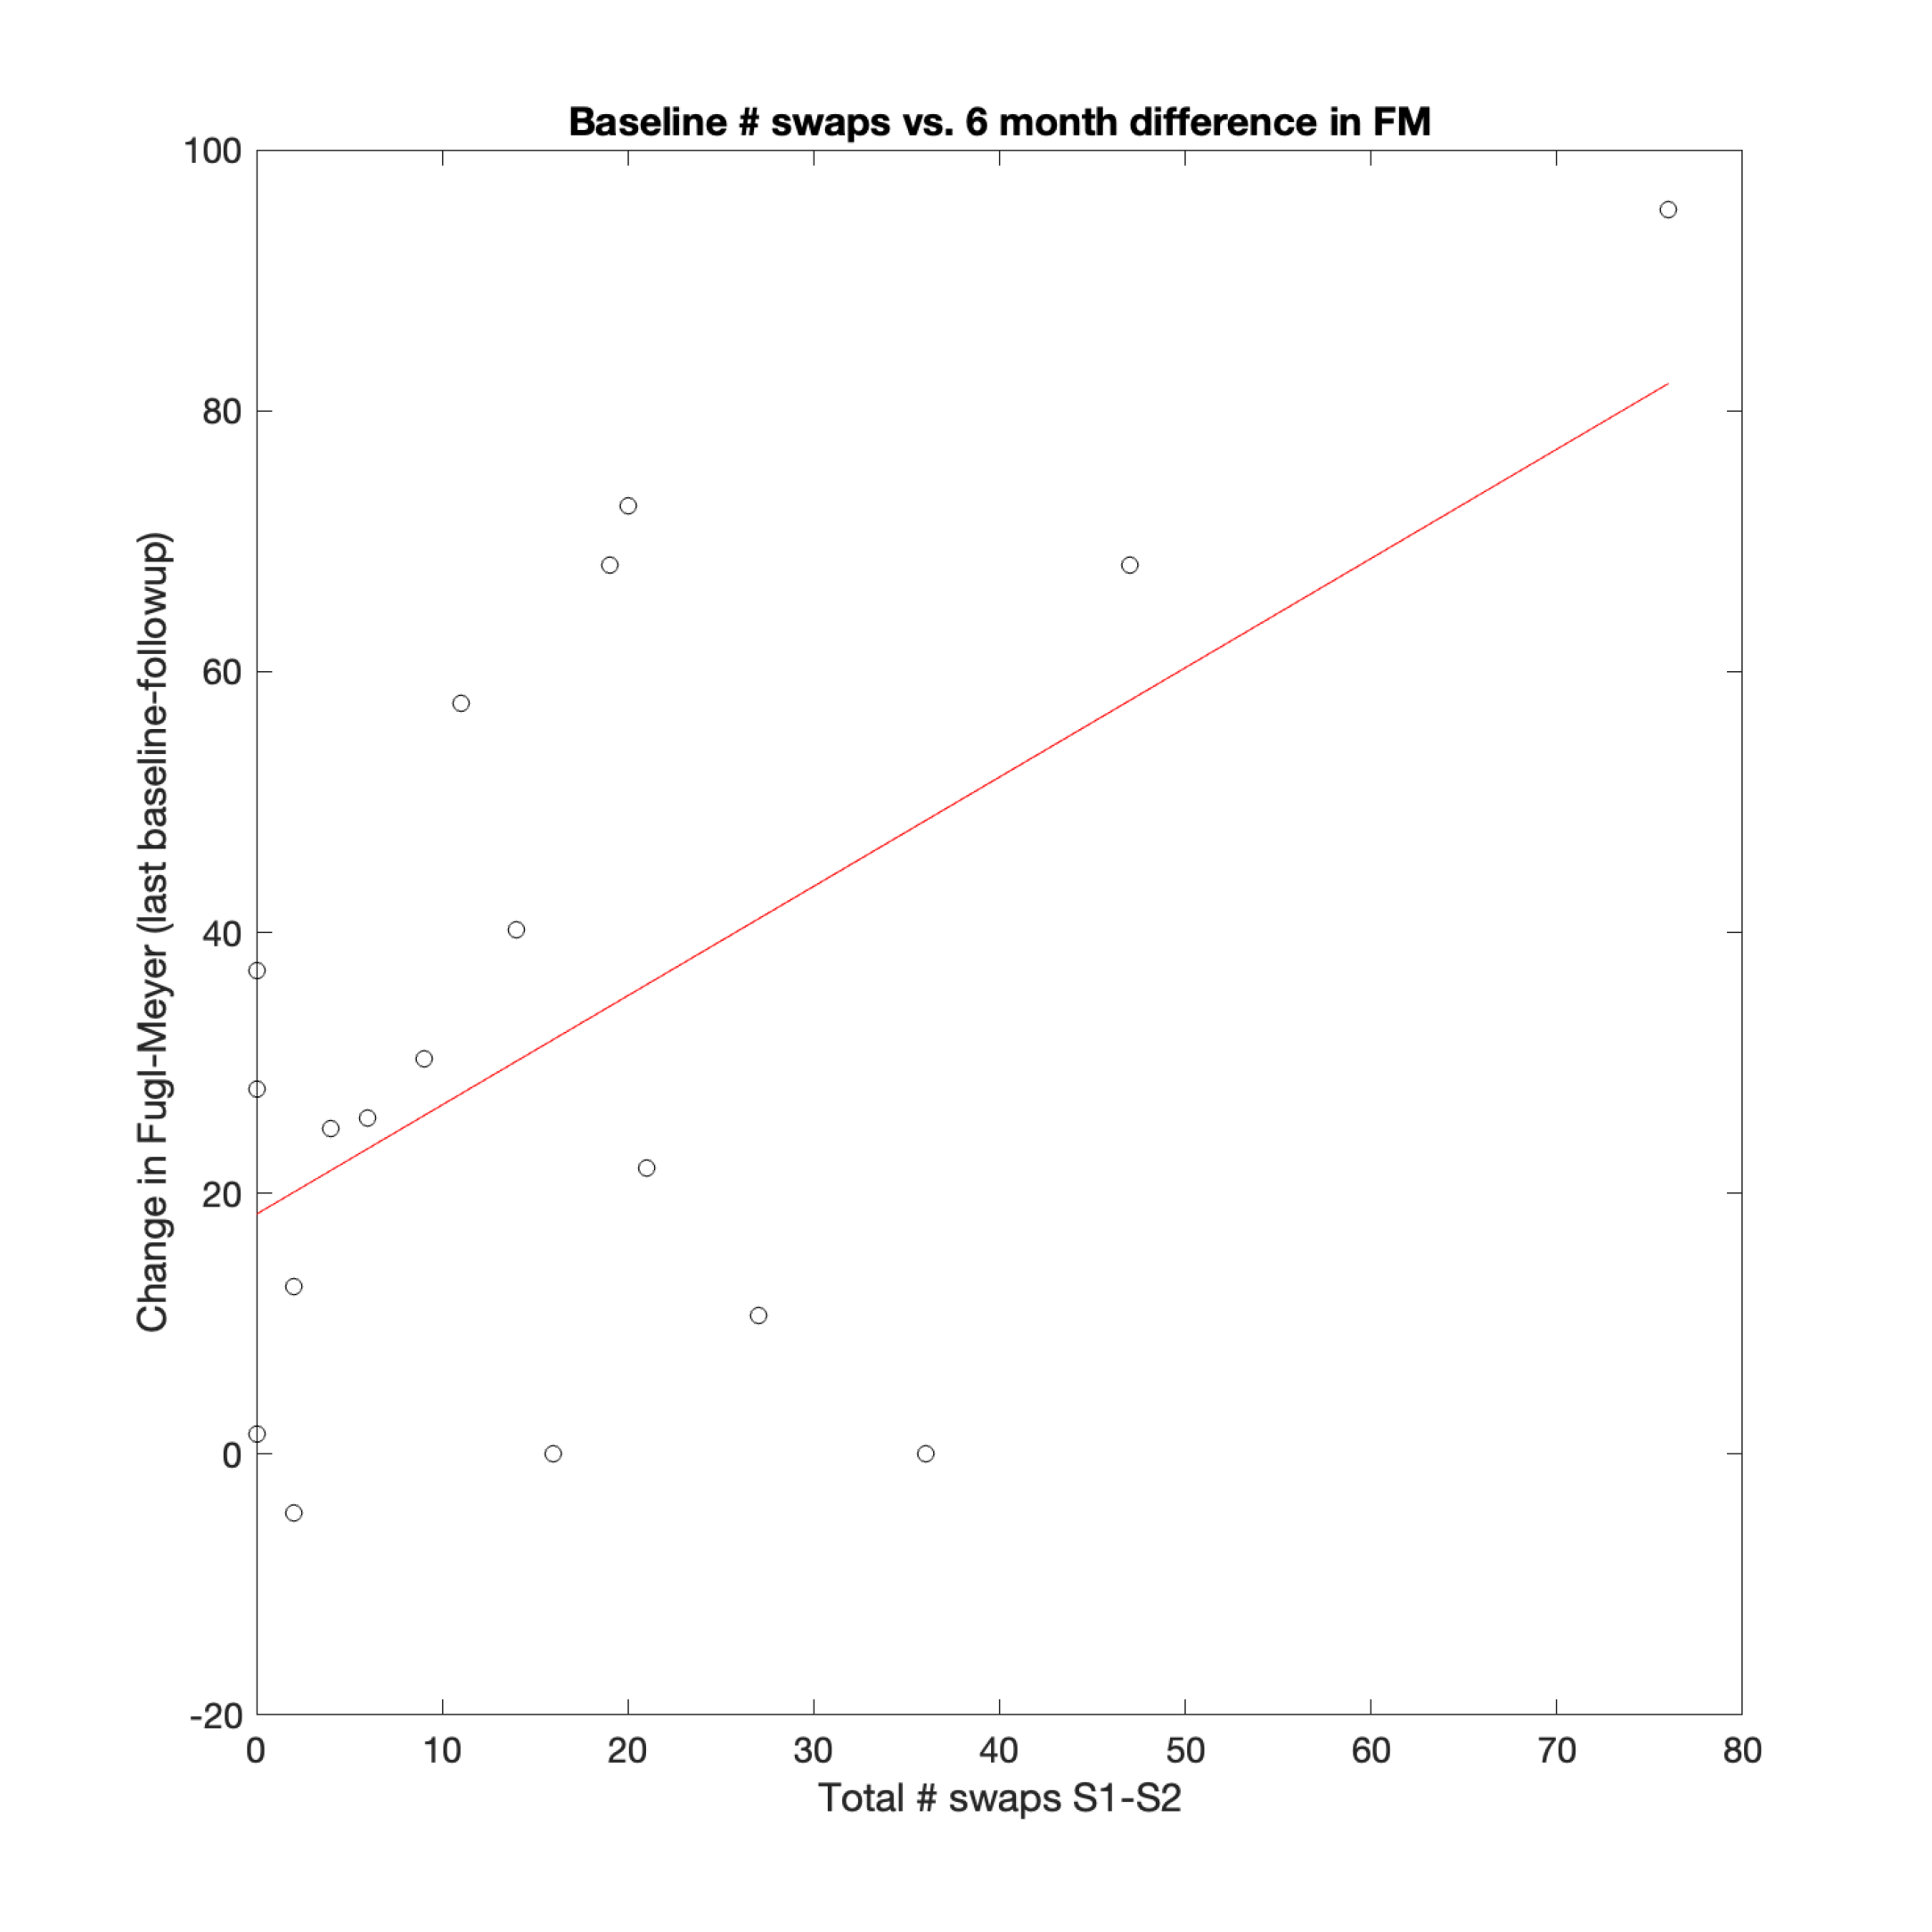

In [39]:
# Analysis 4 - Baseline number of swaps vs 6 month FM
a4=results['baselineswaps_6monthFM']

dict = {'Stat' : ['Pearson p', 'Pearson rho'],
        'Value' : [a4['p'], a4['rho']]}

df4 = pd.DataFrame(dict) 
df4=df4.set_index('Stat')
df4=df4.style.applymap(color_negative_red).set_caption("Analysis 4")
display(df4)
img1 = mpimg.imread(str(figures_dir+'baselineswaps_6monthFM.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img1)
ax1.axis('off')

### Analysis 5
Correlation between sum of remaps (across all pairs of sessions) and the change in FM scores (across all pairs of sessions)

,Value
Stat,
Spearman p,0.003482
Spearman rho,0.317177


(-0.5, 1457.5, 1457.5, -0.5)

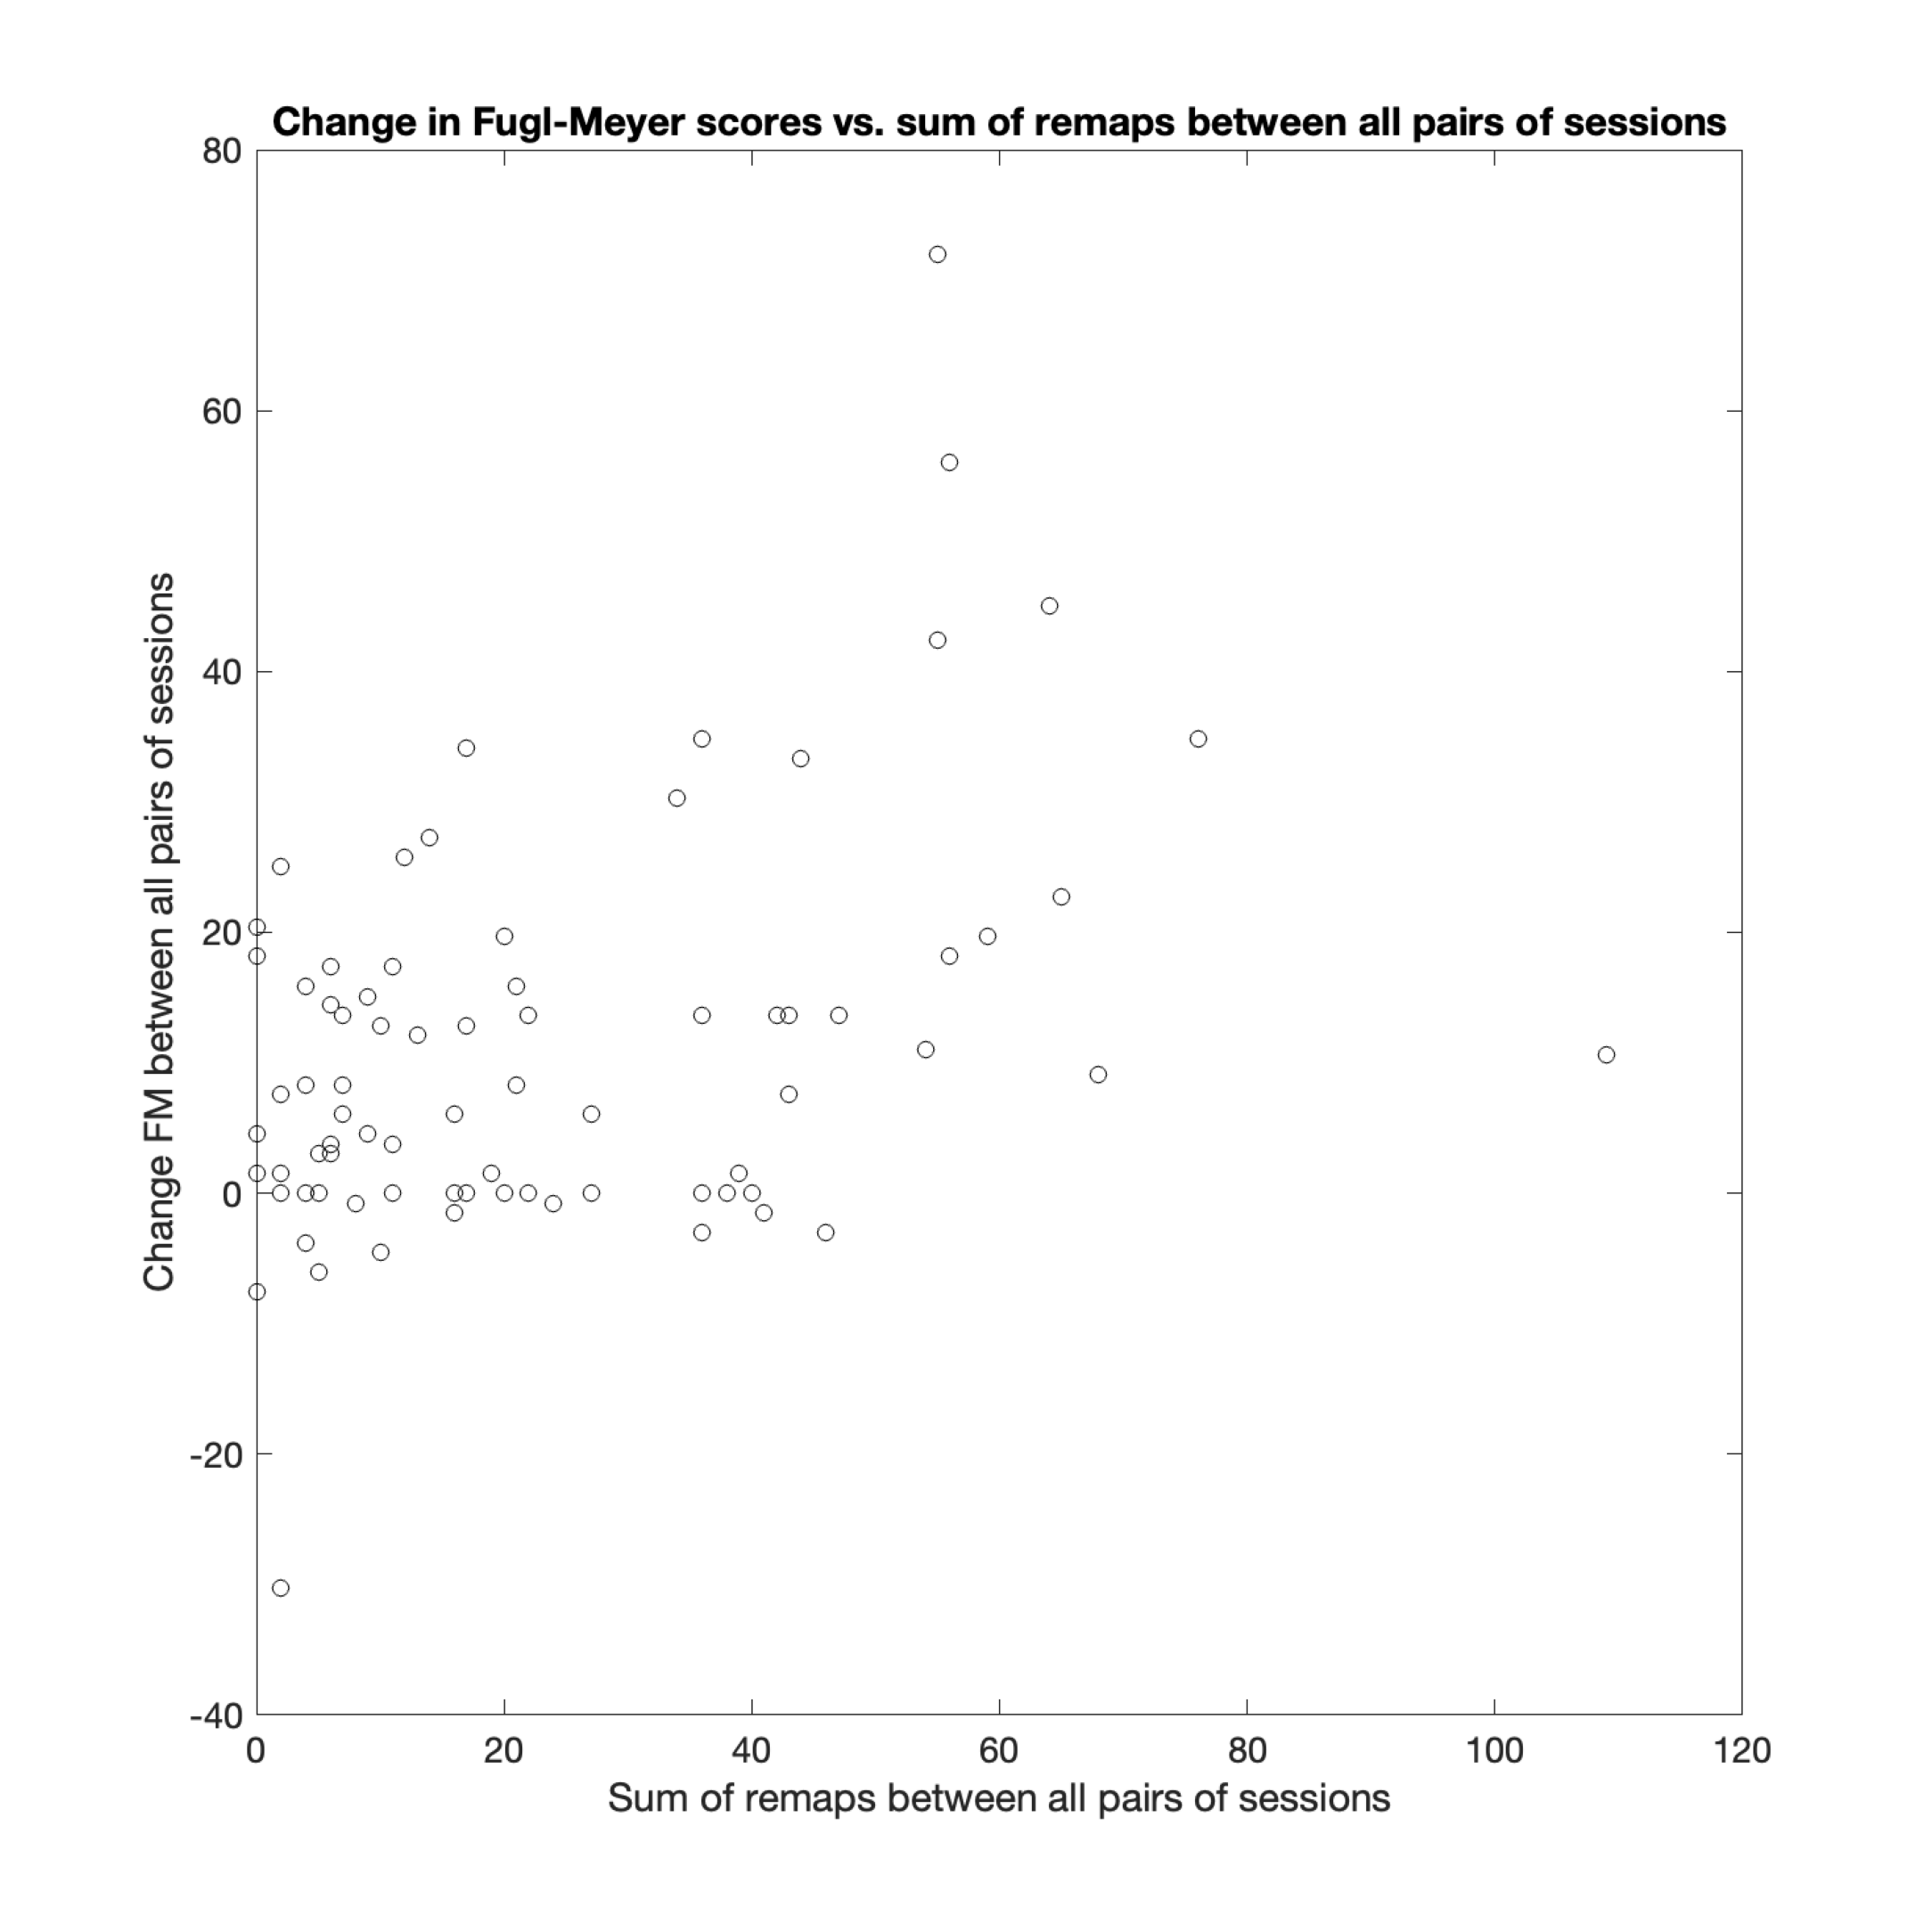

In [40]:
# Analysis 5 - corr_recovery_remaps
a5=results['corr_recovery_remaps']

dict = {'Stat' : ['Spearman p', 'Spearman rho'],
        'Value' : [a5['spearman_p'], a5['spearman_rho']]}

df5 = pd.DataFrame(dict) 
df5=df5.set_index('Stat')
df5=df5.style.applymap(color_negative_red).set_caption("Analysis 5")
display(df5)
img1 = mpimg.imread(str(figures_dir+'sum_remaps_recovery_allsessions.png'))
fig = plt.figure(constrained_layout=True,figsize=(30,30))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img1)
ax1.axis('off')

### Analysis 6

Partial correlation analysis to determine the correlation between sum of remaps (across all pairs of sessions) and the change in FM scores (across all pairs of sessions) while accounting for age and sex. 

In [41]:
# Analysis 6 - corr_recovery_remaps - partial correlation
a6=results['partialcorr_recovery_remaps']

dict = {'p-values' : ['Sum remaps', 'Recovery', 'Age','Sex'],
        'Sum remaps' : [a6['spearman_p'][0][0], a6['spearman_p'][0][1],a6['spearman_p'][0][2],a6['spearman_p'][0][3]], 
        'Recovery' : [a6['spearman_p'][1][0], a6['spearman_p'][1][1],a6['spearman_p'][1][2],a6['spearman_p'][1][3]],
        'Age' : [a6['spearman_p'][2][0], a6['spearman_p'][2][1],a6['spearman_p'][2][2],a6['spearman_p'][2][3]], 
        'Sex' : [a6['spearman_p'][3][0], a6['spearman_p'][3][1],a6['spearman_p'][3][2],a6['spearman_p'][3][3]]}

df6 = pd.DataFrame(dict) 
df6=df6.set_index('p-values')
df6=df6.style.applymap(color_negative_red).set_caption("Analysis 6")
display(df6)



,Sum remaps,Recovery,Age,Sex
p-values,,,,
Sum remaps,0.000000,0.006158,0.560994,0.081340
Recovery,0.006158,0.000000,0.602860,0.753194
Age,0.560994,0.602860,0.000000,0.084794
Sex,0.081340,0.753194,0.084794,0.000000


### Analysis 7
Session-specific correlation bewteen amount of motor recovery between sessions, and the number of swaps between sessions


,S1-S2,S2-S3,S3-S4,S4-S5
Stat,,,,
Pearson p,0.006176,0.058752,0.000408,0.157980
Pearson rho,0.576958,0.418891,0.700270,0.328016


(-0.5, 2082.5, 2082.5, -0.5)

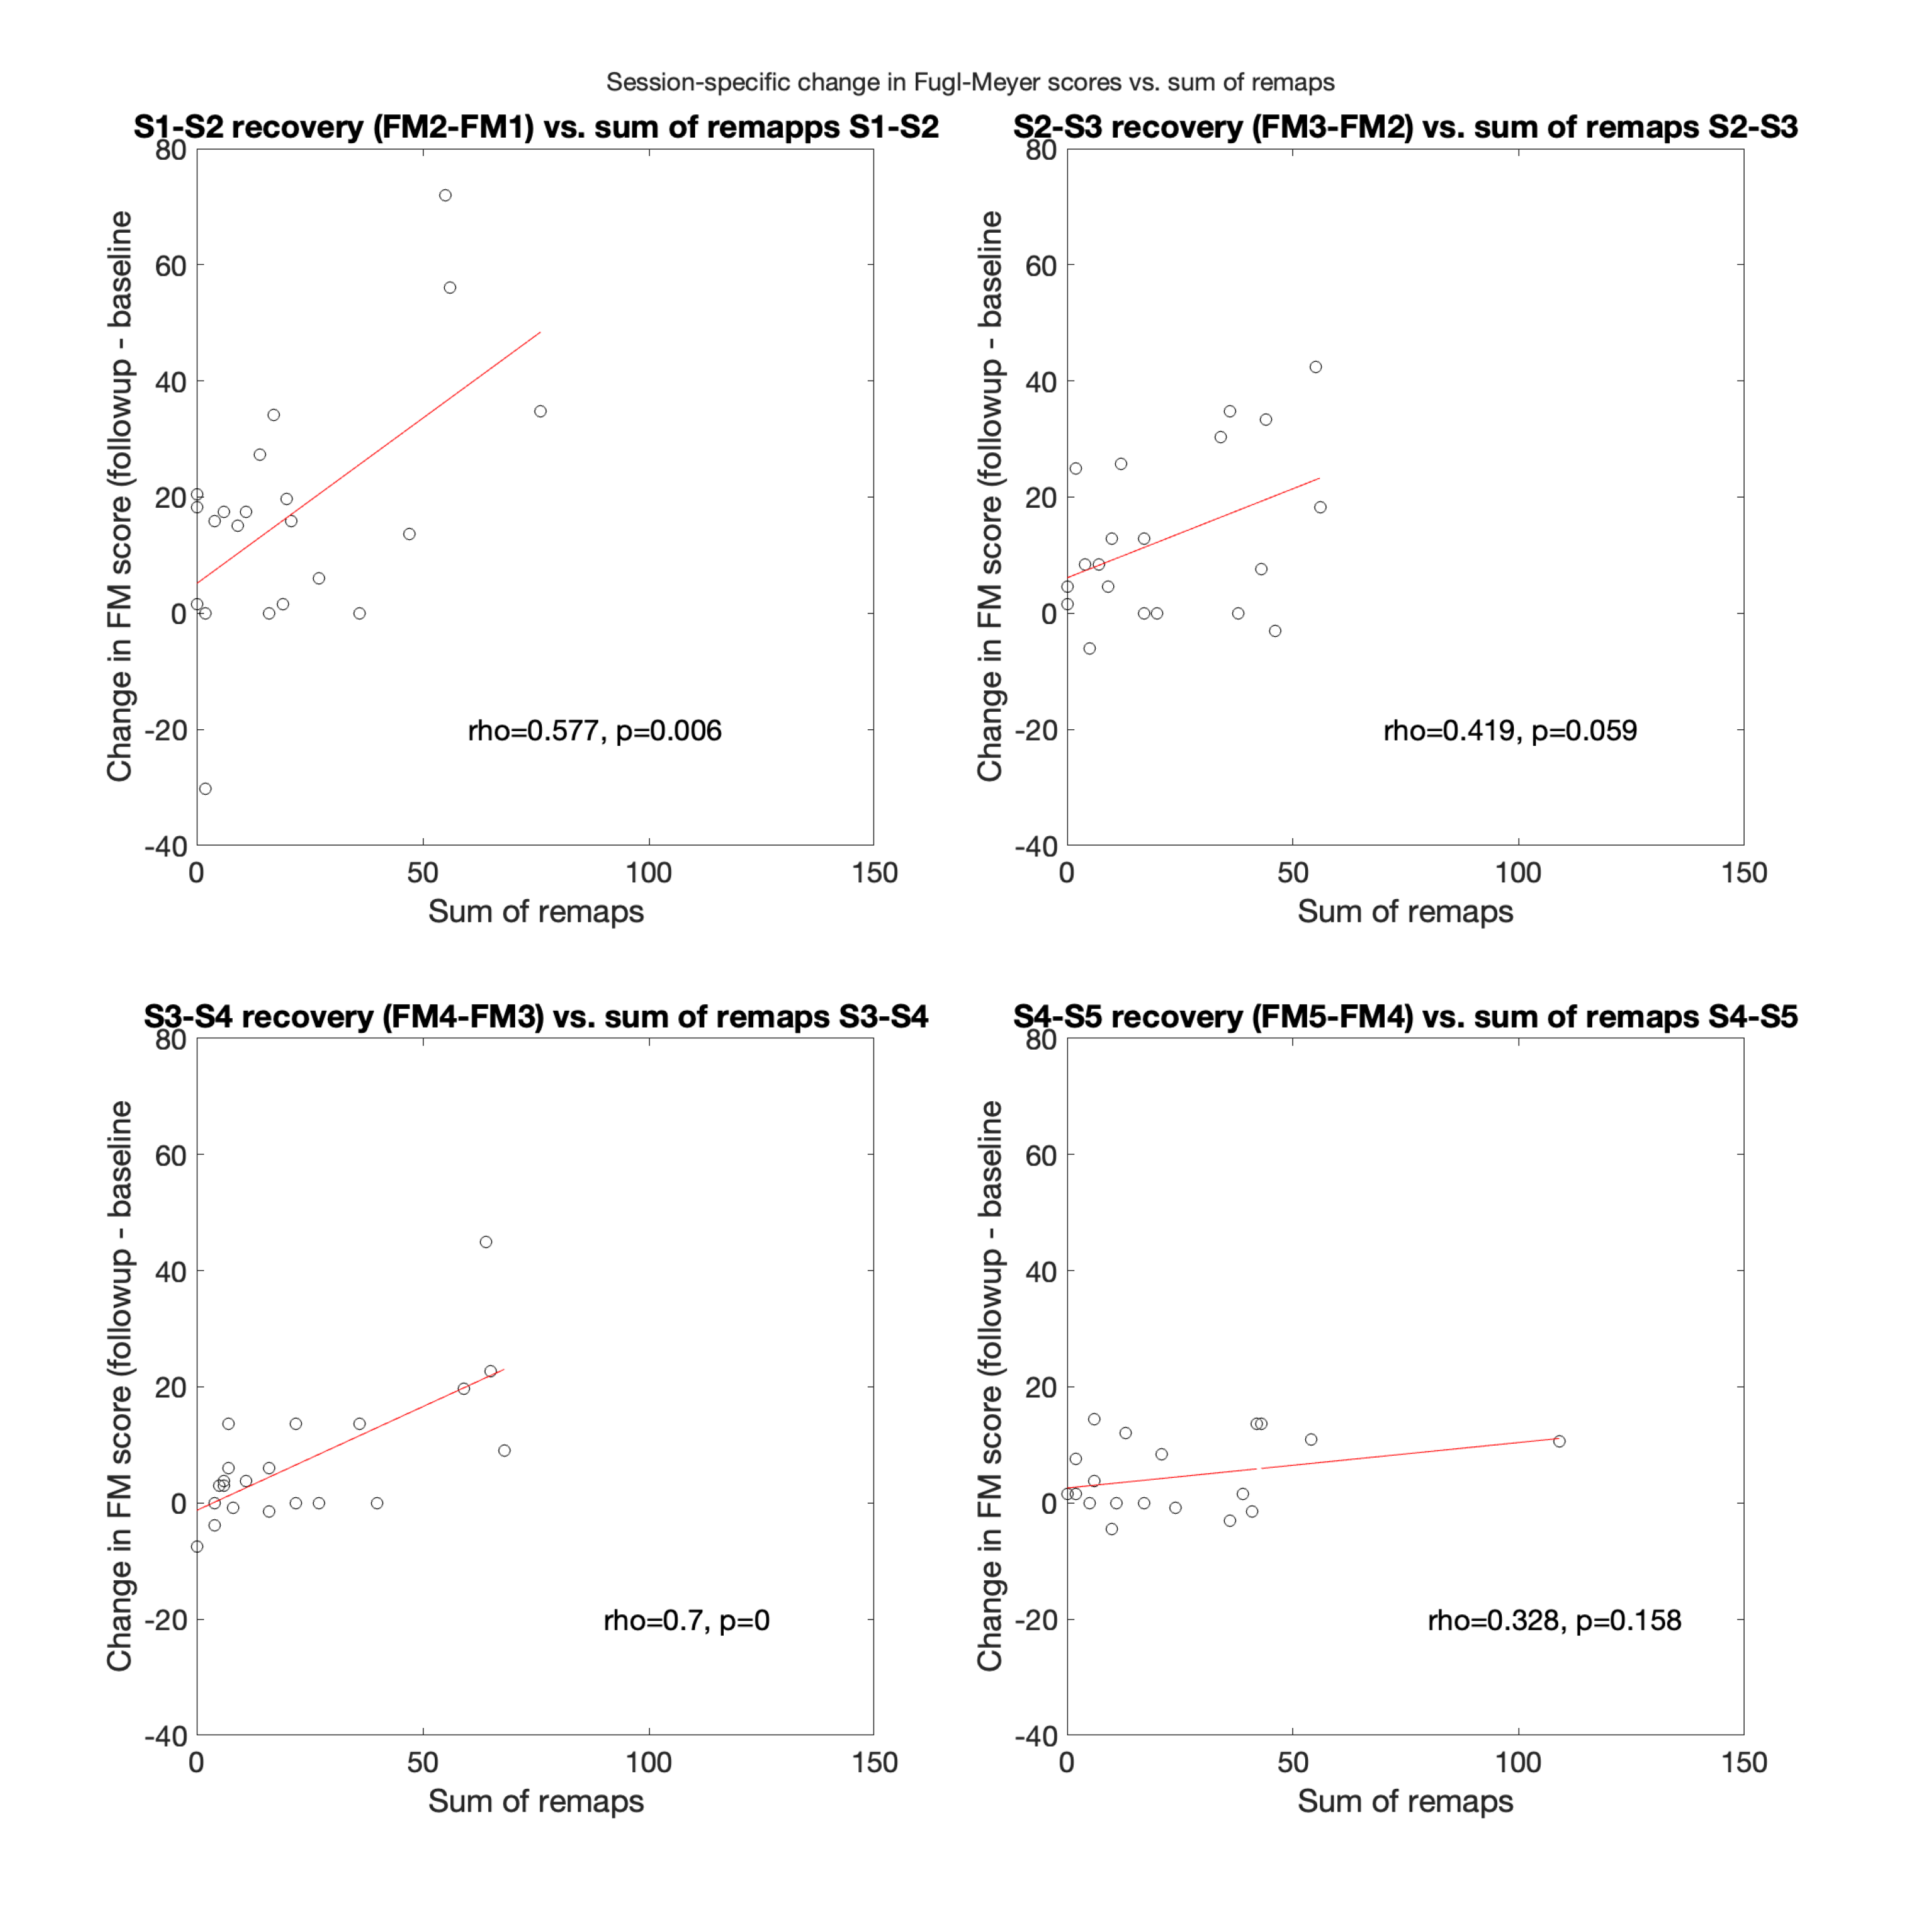

In [42]:
# Analysis 7  
a7=results['corr_recovery_remap_sessionspecific']
a7s1=a7['s1s2']
a7s2=a7['s2s3']
a7s3=a7['s3s4']
a7s4=a7['s4s5']


dict = {'Stat' : ['Pearson p', 'Pearson rho'],
        'S1-S2' : [a7s1['p'], a7s1['rho']] ,
        'S2-S3' : [a7s2['p'], a7s2['rho']] ,
        'S3-S4' : [a7s3['p'], a7s3['rho']] , 
        'S4-S5' : [a7s4['p'], a7s4['rho']]}

df7 = pd.DataFrame(dict) 
df7=df7.set_index('Stat')
df7=df7.style.applymap(color_negative_red).set_caption("Analysis 7")
display(df7)
img1 = mpimg.imread(str(figures_dir+'remaps_recovery_sessionspecific.png'))
fig = plt.figure(constrained_layout=True,figsize=(40,40))
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img1)
ax1.axis('off')